# Customer Segmentation


Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits. In this notebook, I will cluster customers based on their purchase history. 

In [2]:
# Import necessary libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

## Loading, Exploration, & Merging

I will first load the files I need for clustering and take a peek at the data

In [3]:
# Load orders
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
# Load prior orders
prior = pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
# Load train data
train = pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Preliminary understanding of dataset structure:

* Users are identified by their "user_id" in the orders.csv file. Each row of the orders file represents an order made by a user. Orders are identified by "order_id"

* Each user's order is characterized by an "order_number", which specifies when it has been made with respect to the others of the same user

* Each order consists of a set of products, each characterized by the "add_to_cart_order" feature, representing the sequence in which they have been added to the cart

* For each user, we may have n-1 prior orders and 1 train order OR n-1 prior orders and 1 test order in which we have to state what products have been reordered

Now I will merge the orders and priors

In [6]:
# Merging the orders and priors dataframes on 'order_id' and sorting them by 'user_id'
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089398,431534,196,1,1,1,prior,5,4,15,28.0
4089399,431534,12427,2,1,1,prior,5,4,15,28.0
4089400,431534,10258,3,1,1,prior,5,4,15,28.0
4089401,431534,25133,4,1,1,prior,5,4,15,28.0
4089402,431534,10326,5,0,1,prior,5,4,15,28.0


In [10]:
# Load products
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
# Load aisles
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Finally I will merge the previously merged dataframe with the aisle and product data

In [13]:
# Merging all previous dataframes into singular, large dataframe
mt = pd.merge(prior,products, on = ['product_id','product_id'])
mt = pd.merge(mt,orders,on=['order_id','order_id'])
mt = pd.merge(mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [14]:
# Top 10 most popular products
mt['product_name'].value_counts()[0:10]

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

In [15]:
# Total number of unique products
len(mt['product_name'].unique())

49677

In [17]:
# Total number of isles
len(mt['aisle'].unique())

134

In [18]:
# Top ten most popular aisles
mt['aisle'].value_counts()[0:10]

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: aisle, dtype: int64

Because there are thousands of products, I will use aisles instead, which represent categories of products.

I want to find a possible clusters among the different customers and substitute single user_id with the cluster to which they are assumed to belong.

Ths first thing to do is creating a dataframe with all the purchases made by each user

In [19]:
# Dataframe of all purchases and their frequency made by each user
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [20]:
# Number of users
cust_prod.shape

(206209, 134)

I will take a random sample of 50,000 users

In [41]:
# Select random sample of 50,000 users
cust_prod = cust_prod.sample(n = 50000) 

In [42]:
# Number of sampled customers
cust_prod.shape

(50000, 134)

## PCA

We can then execute Principal Component Analysis to the purchase history dataframe. This will hopefully reduce the number of features from the number of aisles to a more manageable number.

In [46]:
# Scale the purchase data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(cust_prod)

In [47]:
# Perform PCA on scaled data
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(std_data)
pca_samples = pca.transform(std_data)

In [49]:
# Put fitted PCA samples into a dataframe
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,-3.079945,0.088478,0.341135,-0.049479,-0.008035,-0.126452,-0.200144,0.078583,-0.104656,-0.068269,...,0.029440,0.052490,-0.060973,-0.085897,0.098932,0.000351,-0.034886,-0.016538,-0.017733,0.003260
1,-2.735374,0.056183,-0.067736,-0.005257,0.013868,0.149951,0.076100,0.126537,0.066798,0.038997,...,0.105206,0.131346,-0.058435,-0.040668,0.028145,-0.155090,0.014976,-0.058046,0.089185,-0.082460
2,15.171368,-2.949173,5.198237,-1.435988,-1.544763,-1.699508,4.906328,0.169000,-0.865548,-0.604010,...,-1.613871,1.119844,-2.413909,0.718129,2.232528,2.293802,0.182713,0.550112,1.027351,-0.642247
3,-2.955152,-0.238087,0.025678,-0.094848,-0.178383,-0.090760,0.189662,0.042885,-0.026088,0.029924,...,-0.044286,-0.028487,-0.020332,0.010192,0.073897,0.042007,-0.156392,0.092542,-0.050596,0.147890
4,-2.588726,0.728460,-0.035635,0.026856,-0.336569,-0.116564,0.084974,0.177460,-0.360815,0.268368,...,0.081957,0.265946,-0.030140,-0.092573,0.013049,-0.020989,0.028978,0.313949,0.032707,-0.020058


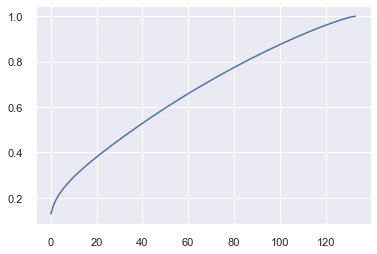

In [31]:
# Plot PCA to find suitable number of components
plt.plot(range(pca.n_components_), pca.explained_variance_ratio_.cumsum())

After PCA and looking at the data in a different orientation, it appears that all components important. PCA may not be necessary or suitable to perform analysis on this data because you cannot reduce the dimension without chopping off a bunch of data.

## Clustering

Now I will try a few different methods of clustering to obtain customer segments.

### K-means

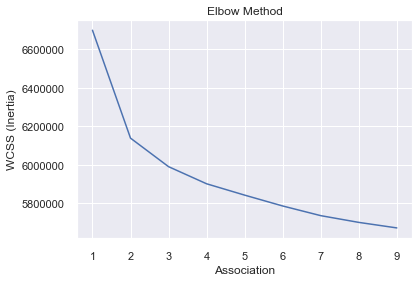

In [70]:
# Use Elbow Method to determine k, or number of clusters
from sklearn.cluster import KMeans

max_k = 10

wcss = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
        max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(ps)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, max_k), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS (Inertia)') #within cluster sum of squares
plt.show()

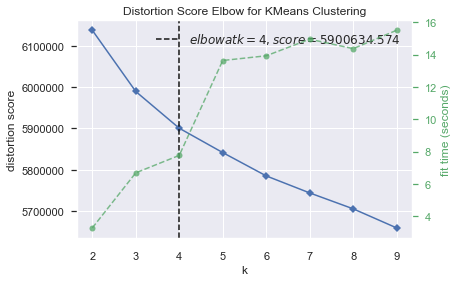

In [81]:
# Hard to tell with graph above, add distortion score for clearer visual
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(ps)   
visualizer.show()

In [51]:
from sklearn.cluster import KMeans

# Found from plots above
optimum_k = 4

# Number of clusters
clusterer = KMeans(n_clusters = optimum_k)

# Fit the data
clusterer.fit(ps)

# Centroid values
centers = clusterer.cluster_centers_

# Cluster labels based on predicted values
c_preds = clusterer.predict(ps)

In [54]:
# Convert dataframe to numpy array for plotting purposes
ps2 = ps.values

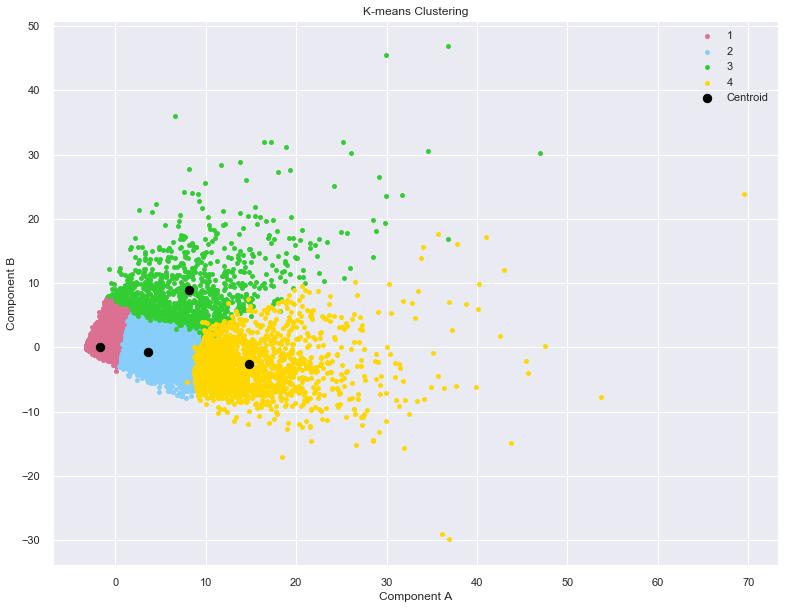

In [100]:
# Choose component from ps dataframe
col1, col2 = 0, 1

plt.figure(num=None, figsize=(13,10))

#Visualizing the clusters
plt.scatter(ps2[c_preds == 0, col1], ps2[c_preds == 0, col2], s = 15, 
            c = 'palevioletred', label = '1')

plt.scatter(ps2[c_preds == 1, col1], ps2[c_preds == 1, col2], s = 15, 
            c = 'lightskyblue', label = '2')

plt.scatter(ps2[c_preds == 2, col1], ps2[c_preds == 2, col2], s = 15, 
            c = 'limegreen', label = '3')

plt.scatter(ps2[c_preds == 3, col1], ps2[c_preds == 3, col2], s = 15, 
            c = 'gold', label = '4')

#Plotting the centroids of the clusters
plt.scatter(clusterer.cluster_centers_[:, 0], 
            clusterer.cluster_centers_[:,1], s = 70, 
            c = 'black', label = 'Centroid')


plt.title("K-means Clustering")
plt.xlabel("Component A")
plt.ylabel("Component B")
plt.legend()

### DBSCAN

K-means produced a fairly telling plot, but let's see what DBSCAN can do.

In [56]:
from sklearn.cluster import DBSCAN

# Fit data to DBSCAN
db = DBSCAN(eps=0.85, min_samples=15).fit(ps)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


In [57]:
# DBSCAN predictions
y_pred = db.fit_predict(ps)

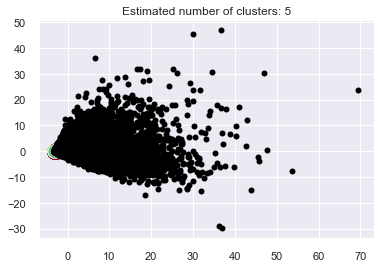

In [74]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = ps2[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = ps2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

I attempted to tune the parameters, but the runtime was taking too long to be able to really narrow down the arguments. The end result labeled almost all of the data as noise.

### t-SNE

Take a subsample to perfrom t-SNE

In [140]:
raf = cust_prod.values
raf = raf[:5000]
raf.shape

(5000, 134)

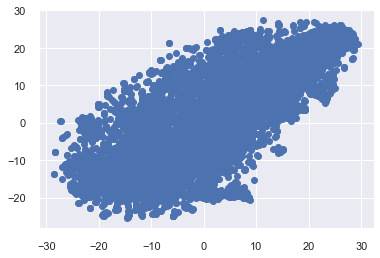

In [145]:
# t-SNE

from sklearn.manifold import TSNE

# model = TSNE(learning_rate=200)
model = TSNE(perplexity=100, learning_rate = 300)
transformed = model.fit_transform(raf)
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys)

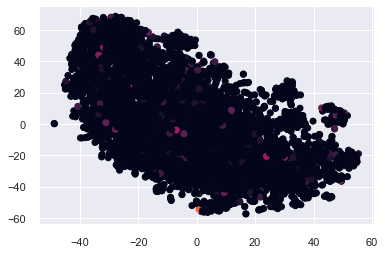

In [144]:
result = raf[:, 0]
plt.scatter(xs,ys, c=result)
plt.show()

t-SNE seems to tell a very similar story to DBSCAN. Almost all of the data points are classified as noise.

## Cluster Characteristics

We have found a possible clustering for our customers using K-means. Let's check if we also manage to find some interesting pattern beneath it.

In [78]:
# Add cluster assignment from K-means to user purchase dataframe
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds #KMeans

clust_prod

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
4328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
119620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205045,0,2,0,0,70,1,7,0,0,0,...,0,0,11,2,0,0,6,0,53,3
130607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149510,0,1,0,0,0,0,0,0,0,0,...,0,3,0,0,0,1,0,0,1,0
56907,0,0,0,0,0,0,1,1,0,0,...,59,0,4,0,0,2,2,0,2,1
73597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


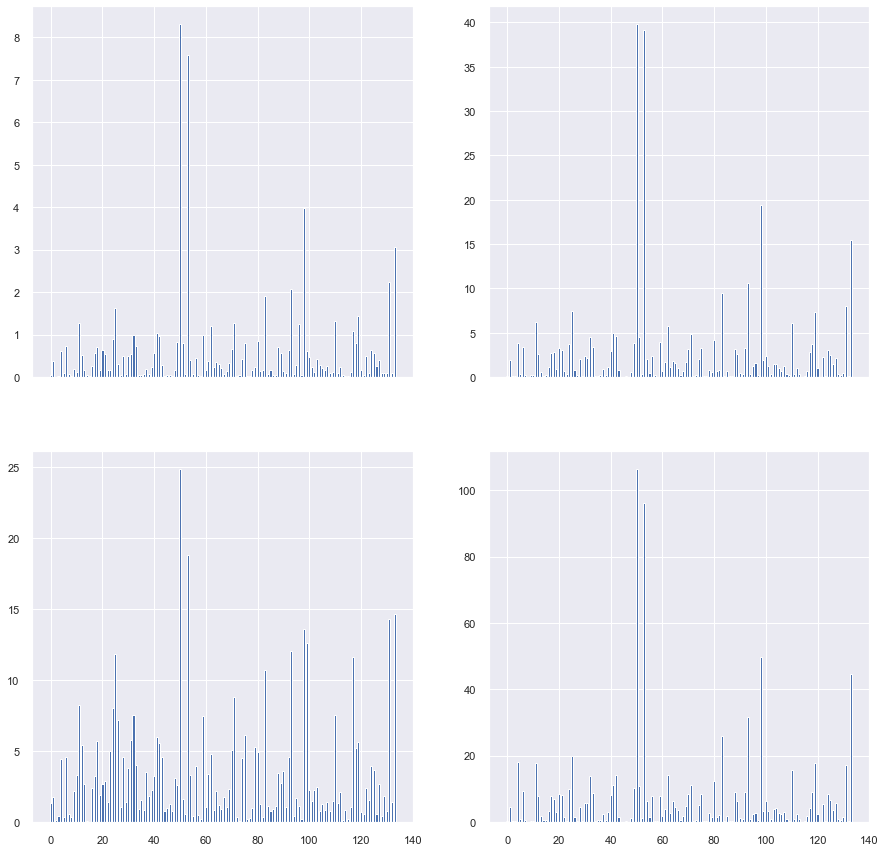

In [118]:
# Visualize how customers in each cluster differ in shopping aisles
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()

arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)


plt.show()

Let's check out what are the top 10 goods bought by people of each cluster. We are going to rely first on the absolute data and then on a percentage among the top 8 products for each cluster.

#### Cluster 1

In [103]:
cluster1 = clust_prod[clust_prod.cluster == 0]

In [133]:
# Top 10 products in cluster 1
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     8.312649
fresh vegetables                 7.594817
packaged vegetables fruits       3.982334
yogurt                           3.070899
water seltzer sparkling water    2.243566
packaged cheese                  2.063946
milk                             1.916857
chips pretzels                   1.620292
soy lactosefree                  1.444485
refrigerated                     1.308628
dtype: float64

In [106]:
cluster1.shape

(38548, 135)

#### Cluster 2

In [107]:
cluster2 = clust_prod[clust_prod.cluster == 1]

In [108]:
# Top 10 products in cluster 2
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     39.824204
fresh vegetables                 39.130168
packaged vegetables fruits       19.381587
yogurt                           15.409033
packaged cheese                  10.565258
milk                              9.449682
water seltzer sparkling water     7.982860
chips pretzels                    7.501563
soy lactosefree                   7.362247
bread                             6.238680
dtype: float64

In [109]:
cluster2.shape

(8635, 135)

#### Cluster 3

In [110]:
cluster3 = clust_prod[clust_prod.cluster == 2]

In [111]:
# Top 10 products in cluster 3
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     24.904147
fresh vegetables                 18.820276
yogurt                           14.649770
water seltzer sparkling water    14.307834
packaged vegetables fruits       13.635023
paper goods                      12.627650
packaged cheese                  12.083871
chips pretzels                   11.805530
soft drinks                      11.619355
milk                             10.698618
dtype: float64

In [112]:
cluster3.shape

(1085, 135)

#### Cluster 4

In [113]:
cluster4 = clust_prod[clust_prod.cluster == 3]

In [114]:
# Top 10 products in cluster 4
c3.sort_values(ascending=False)[0:10]

aisle
fresh fruits                  106.501155
fresh vegetables               96.122402
packaged vegetables fruits     49.863164
yogurt                         44.726905
packaged cheese                31.536952
milk                           25.959007
chips pretzels                 19.852194
baby food formula              18.122979
soy lactosefree                17.855081
bread                          17.661085
dtype: float64

In [115]:
cluster3.shape

(1085, 135)

A first analysis of the clusters shows that:

* fresh fruits
* fresh vegetables
* packaged vegetables fruits
* yogurt
* packaged cheese
* milk
* water seltzer sparkling water
* chips pretzels

are the products that are in the top 10 of every cluster.

We can also see that the clusters differ in quantities and proportions as well as how a cluster could be characterized by a product that is not included in the list above. For example, we could characterize cluster 4 by "Baby Food Formula", a product that is fairly significant compared to the other clusters.

It is easy to see some the differences of the 8 most popular products among the clusters by visualizing them next to each other.

In [137]:
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
                 
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
cluster_means

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,8.312649,7.594817,3.982334,3.070899,2.063946,1.916857,2.243566,1.620292
1,39.824204,39.130168,19.381587,15.409033,10.565258,9.449682,7.982860,7.501563
2,24.904147,18.820276,13.635023,14.649770,12.083871,10.698618,14.307834,11.805530
3,106.501155,96.122402,49.863164,44.726905,31.536952,25.959007,17.117206,19.852194


Another interesting looking at the clustering is viewing the 10th to 15th most bought products for each cluster, which will not include the generic products (i.e. vegetables, fruits, water, etc.) bought by everyone. By taking into account more products, the clusters start to differ even more.

In [88]:
c0.sort_values(ascending=False)[10:15]

aisle
ice cream ice       1.267848
bread               1.262089
packaged produce    1.255059
frozen produce      1.200192
soft drinks         1.075802
dtype: float64

In [89]:
c1.sort_values(ascending=False)[10:15]

aisle
refrigerated           6.104806
frozen produce         5.762478
eggs                   4.944644
ice cream ice          4.886740
energy granola bars    4.642270
dtype: float64

In [90]:
c2.sort_values(ascending=False)[10:15]

aisle
ice cream ice    8.830415
bread            8.264516
cereal           8.013825
refrigerated     7.549309
crackers         7.518894
dtype: float64

In [91]:
c3.sort_values(ascending=False)[10:15]

aisle
water seltzer sparkling water    17.117206
refrigerated                     15.554850
frozen produce                   14.236143
energy granola bars              14.036952
crackers                         13.904157
dtype: float64

For any business, doing customer segmentation has a variety of advantages: determining the appropriate product pricing, developing effective and customized marketing campaigns, designing an optimal distribution strategy, choosing specific product features for deployment, and prioritizing new product development efforts. As evidenced in this analysis, there are a variety of ways that Instacart can execute any of the above business strategies with the large customer base that the company has. If I were to continue with this analysis, I might try clustering on RFM features or using the customer segments as labels for a predictive classification algorithm.

~ Katy Kiefer ~